In [55]:
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np
import seaborn as sns
%matplotlib inline

In [60]:
TRAIN_DIR = '/Users/hehongwei/datas/Cat_Dog/train/'
TEST_DIR = '/Users/hehongwei/datas/Cat_Dog/test/'

ROWS = 64
COLS = 64
CHANNELS = 3
train_images = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]
train_images = train_images[1:]
train_dogs = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'dog' in i]
train_cats = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR) if 'cat' in i]

test_images = [TEST_DIR + i for i in os.listdir(TEST_DIR)]
test_images = test_images[1:]

train_images = train_dogs[:1000] + train_cats[:1000]
random.shuffle(train_images)
test_images = test_images[:25]

def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)  # cv2.IMREAD_GRAYSCALE
    return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype=np.uint8)

    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T  # 转化为Theano需要的数据类型 3*64*64
        if i % 250 == 0:
            print('Processed {} of {}'.format(i, count))

    return data

train = prep_data(train_images)
test = prep_data(test_images)

Processed 0 of 2000
Processed 250 of 2000
Processed 500 of 2000
Processed 750 of 2000
Processed 1000 of 2000
Processed 1250 of 2000
Processed 1500 of 2000
Processed 1750 of 2000
Processed 0 of 25


In [61]:
print train.shape
print test.shape

(2000, 3, 64, 64)
(25, 3, 64, 64)


In [64]:
train[0][0]

array([[117, 126, 131, ..., 190, 195, 192],
       [125, 127, 129, ..., 201, 202, 187],
       [126, 132, 133, ..., 194, 187, 165],
       ..., 
       [125, 112, 141, ..., 185, 186, 189],
       [126, 131, 136, ..., 191, 194, 184],
       [123, 128, 136, ..., 192, 187, 181]], dtype=uint8)

In [65]:
labels = []
for i in train_images:
    if 'cat' in i:
        labels.append(0)
    else:
        labels.append(1)

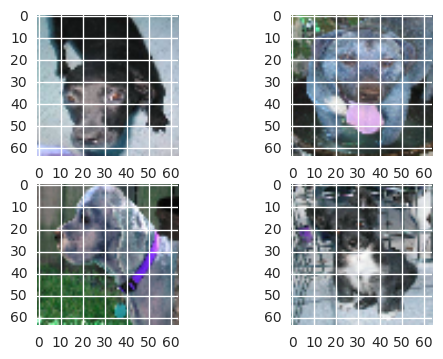

In [66]:
plt.subplot(2, 2, 1)
plt.imshow(train[0].T)
plt.subplot(2, 2, 2)
plt.imshow(train[1].T)
plt.subplot(2, 2, 3)
plt.imshow(train[2].T)
plt.subplot(2, 2, 4)
plt.imshow(train[3].T)
plt.show()

In [84]:
train = train.reshape([train.shape[0], ROWS*COLS*CHANNELS])
labels = np.array(labels).reshape([len(labels), 1])
print train.shape
print labels.shape

(2000, 12288)
(2000, 1)


# 用TensorFlow构建CNN

In [70]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape,  stddev=0.1) # 均值0，方差为0.1的正态分布
    Weight = tf.Variable(initial)
    return Weight

In [71]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    Bias = tf.Variable(initial)
    return Bias

In [72]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [73]:
def max_poo_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [74]:
xs = tf.placeholder(tf.float32, [None, ROWS*COLS*CHANNELS])
ys = tf.placeholder(tf.float32, [None, 1])
keep_prob = tf.placeholder(tf.float32)

In [75]:
x_image = tf.reshape(xs, [-1, ROWS, COLS, CHANNELS])

定义第一层卷积

In [78]:
W_conv1 = weight_variable([5, 5, 3, 32]) # 32个5*5*3的卷积核
b_conv1 = bias_variable([32]) # 由于我使用的是SAME，所以图像变厚为64*64*32

In [79]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1)+b_conv1)
h_pool1 = max_poo_2x2(h_conv1) # 池化之后变成32*32*32

定义第二层卷积

In [87]:
W_conv2 = weight_variable([5, 5, 32, 64]) # 64个5*5*32卷积核
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2)+b_conv2)
h_conv2 = max_poo_2x2(h_conv2) # 词化之后变成16*16*64

定义第三层卷积

In [ ]:
W_conv3 = 